In [39]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [40]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

In [41]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [42]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,B3128,female,experimental,experimental,2024-03-06,1.0,22.4,34.6,31.1,3.5,52.2,48.2,4.0,1
764,B3129,female,control,control,2024-03-06,0.0,21.5,46.3,43.7,2.6,52.0,49.2,2.8,0
765,B3130,female,control,control,2024-03-06,0.0,22.9,36.6,33.0,3.6,51.7,48.9,2.8,0
766,B3131,female,experimental,experimental,2024-03-06,1.0,21.7,44.0,41.3,2.7,50.6,47.6,3.0,1


In [43]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today          float64
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [44]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [45]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
       '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
       '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06'],
      dtype=object)

In [46]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,77.4500,-1.0000,-1.0000,-1.0000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.8875,51.5000,9.0125,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,2.9375,51.2875,3.0625,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.9875,51.5250,3.0000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.3625,51.7500,3.1500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
91,male,experimental,2024-03-02,4.0,26.8500,48.5500,45.7375,2.8125,46.6375,2.8250,3.0
92,male,experimental,2024-03-03,2.0,26.8750,49.5625,46.6750,2.8875,51.7375,2.5750,3.0
93,male,experimental,2024-03-04,2.0,26.7750,46.6750,43.8375,2.8375,49.1625,2.5250,3.0
94,male,experimental,2024-03-05,2.0,27.1875,43.8375,40.9625,2.8750,46.6375,2.7625,3.0


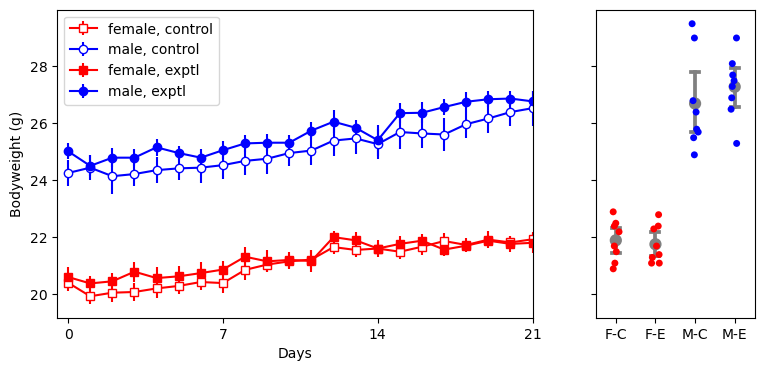

In [47]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(9, 4), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

In [48]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
736,B3101,male,control,control,2024-03-06,0.0,24.9,65.5,62.8,2.7,49.1,46.8,2.3,2
737,B3102,male,control,control,2024-03-06,0.0,25.8,66.3,63.3,3.0,46.4,43.6,2.8,2
738,B3103,male,experimental,experimental,2024-03-06,1.0,25.3,51.3,48.3,3.0,51.4,48.9,2.5,3
739,B3104,male,experimental,experimental,2024-03-06,1.0,28.1,44.0,41.5,2.5,51.3,48.8,2.5,3
740,B3105,male,control,control,2024-03-06,0.0,29.5,52.8,49.1,3.7,43.1,39.9,3.2,2
741,B3106,male,control,control,2024-03-06,0.0,29.0,56.9,53.9,3.0,44.0,41.5,2.5,2
742,B3107,male,experimental,experimental,2024-03-06,1.0,27.7,38.3,34.9,3.4,52.5,49.9,2.6,3
743,B3108,male,experimental,experimental,2024-03-06,1.0,26.9,38.6,36.4,2.2,51.8,50.1,1.7,3
744,B3109,male,control,control,2024-03-06,0.0,26.8,46.7,43.9,2.8,47.1,44.8,2.3,2
745,B3110,male,control,control,2024-03-06,0.0,26.4,50.5,47.7,2.8,46.7,44.4,2.3,2


In [49]:
today

'2024-03-06'

In [50]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [51]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    
    print("the number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

the number of outliers being replaced for food_intake is 6
the number of outliers being replaced for water_intake is 4


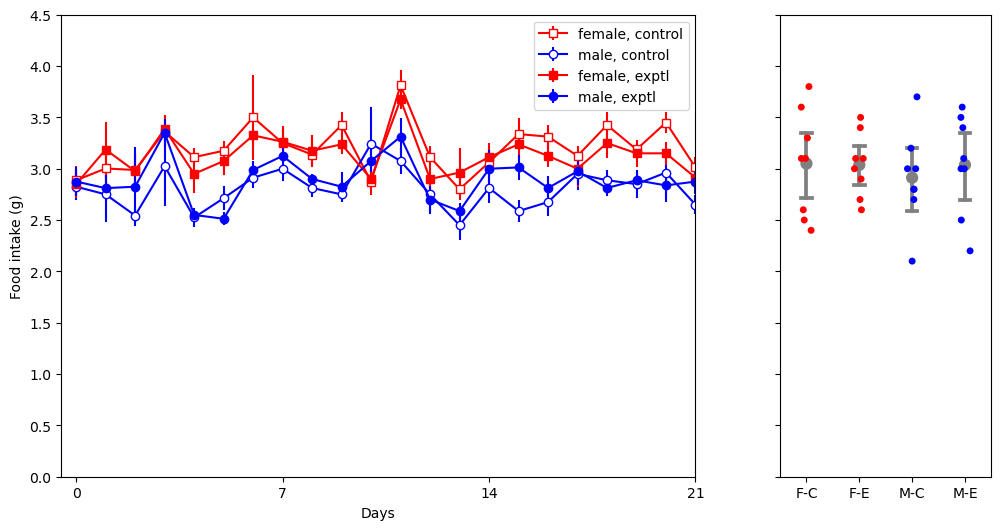

In [52]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


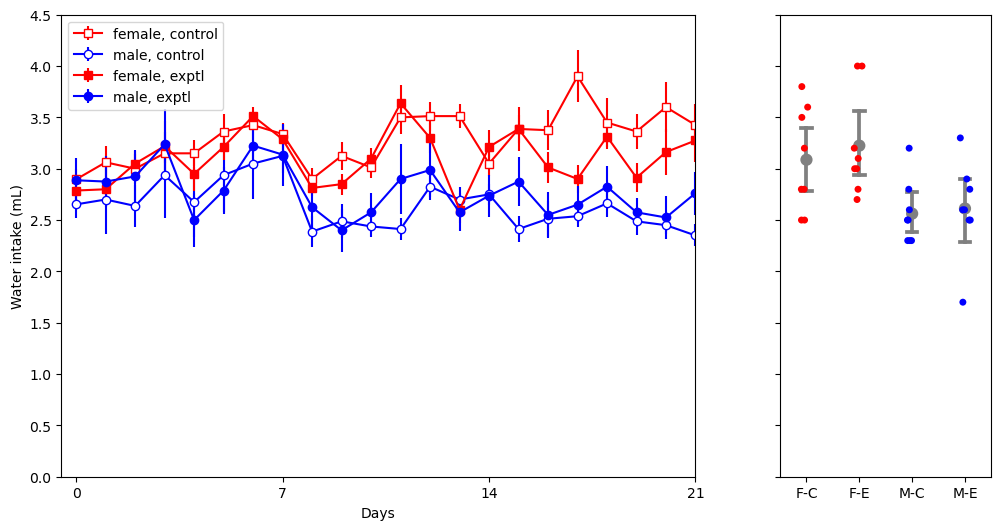

In [53]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


In [54]:
df.query("date == '2024-02-13'")

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
37,B3106,male,control,control,2024-02-13,0.0,26.4,52.5,49.3,3.2,51.0,48.5,2.5,2
38,B3107,male,experimental,control,2024-02-13,0.0,24.6,62.0,59.4,2.6,50.6,48.1,2.5,3
39,B3108,male,experimental,control,2024-02-13,0.0,26.0,57.7,54.6,3.1,50.7,48.4,2.3,3
40,B3109,male,control,control,2024-02-13,0.0,23.9,60.5,57.7,2.8,49.0,47,2.0,2
41,B3110,male,control,control,2024-02-13,0.0,24.2,65.2,62.8,2.4,50.4,47.9,2.5,2


In [55]:
df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.887500,51.5000,2.896591,0.0
1,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,3.002273,51.2875,3.062500,0.0
2,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.987500,51.5250,3.000000,0.0
3,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.362500,51.7500,3.150000,0.0
4,female,control,2024-02-17,0.0,20.3000,69.4250,66.3125,3.112500,48.6000,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
87,male,experimental,2024-03-02,4.0,26.8500,48.5500,45.7375,2.812500,46.6375,2.825000,3.0
88,male,experimental,2024-03-03,2.0,26.8750,49.5625,46.6750,2.887500,51.7375,2.575000,3.0
89,male,experimental,2024-03-04,2.0,26.7750,46.6750,43.8375,2.837500,49.1625,2.525000,3.0
90,male,experimental,2024-03-05,2.0,27.1875,43.8375,40.9625,2.875000,46.6375,2.762500,3.0


In [56]:
mean_fw.query("sex == 'female' and group == 'control'").water_intake
sem_fw.query("sex == 'female' and group == 'control'").water_intake

0     0.101187
1     0.155767
2     0.147600
3     0.098198
4     0.126773
5     0.170018
6     0.045316
7     0.086474
8     0.105221
9     0.135949
10    0.102535
11    0.161466
12    0.141973
13    0.120175
14    0.118019
15    0.218303
16    0.194340
17    0.253546
18    0.238298
19    0.168965
20    0.241276
21    0.204197
22    0.179720
Name: water_intake, dtype: float64

In [57]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph

In [58]:
#I'm not really sure what happens in the following cells: 
#It seems like it's double?

In [59]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
            
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

# replace_outliers(df, "food_intake")

In [60]:
df_food_water

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,B3128,female,experimental,experimental,2024-03-06,1.0,22.4,34.6,31.1,3.5,52.2,48.2,4.0,1
764,B3129,female,control,control,2024-03-06,0.0,21.5,46.3,43.7,2.6,52.0,49.2,2.8,0
765,B3130,female,control,control,2024-03-06,0.0,22.9,36.6,33.0,3.6,51.7,48.9,2.8,0
766,B3131,female,experimental,experimental,2024-03-06,1.0,21.7,44.0,41.3,2.7,50.6,47.6,3.0,1


In [61]:
a = np.nan
np.isnan(a)

True

In [62]:
df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

,animal_id,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,B3101,0.000000,22.775000,56.208333,56.125000,2.612500,45.533333,2.175000,2.0
1,B3102,0.000000,24.808333,52.258333,51.970833,2.620833,45.600000,2.529167,2.0
2,B3103,12.354167,24.200000,50.445833,50.087500,2.629167,46.729167,2.362500,3.0
3,B3104,12.354167,26.191667,46.529167,46.087500,2.712500,47.187500,2.208333,3.0
4,B3105,0.000000,27.054167,52.887500,52.400000,2.833333,45.262500,2.704167,2.0
5,B3106,0.000000,27.000000,53.212500,52.620833,2.779167,45.595833,2.379167,2.0
6,B3107,12.354167,26.120833,48.758333,48.795833,2.545833,46.704167,2.233333,3.0
7,B3108,12.354167,26.300000,50.616667,50.387500,2.633333,46.937500,2.108333,3.0
8,B3109,0.000000,25.412500,51.900000,51.800000,2.620833,45.762500,2.283333,2.0
9,B3110,0.000000,25.212500,52.954167,53.083333,2.587500,46.000000,2.133333,2.0


In [63]:
#starting from here my own (pathetic?) attempts at coding

Text(0.5, 1.0, 'Food Intake vs. Water Intake')

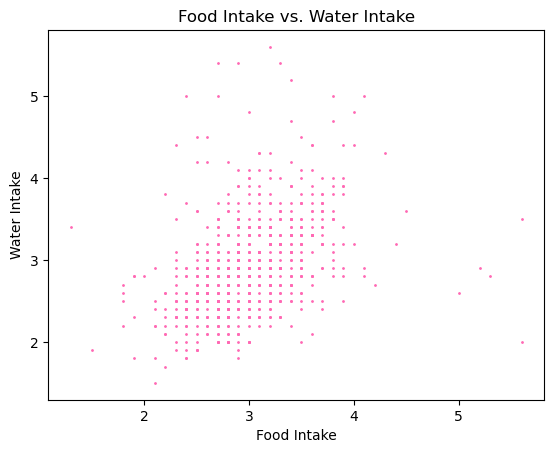

In [64]:
# I want a scatterplot to see whether higher food intake is correlated with higher water intake
# First maybe try for the whole data frame --> should be easier
# If that works out, try to make the subdivision in groups

# First the outliers have to be removed
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])

    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

# Plotting the scatter plot (using the matplotlib library)
plt.scatter(x=df_food_water['food_intake'], y=df_food_water['water_intake'], s=1, c="hotpink")
plt.xlabel('Food Intake')
plt.ylabel('Water Intake')
plt.title('Food Intake vs. Water Intake')

# At first glance, it seems that animals that have a higher food intake also have a higher water intake
# This graph only displays ALL datapoints for all animals, not a general mean

       sex         group        date
0   female       control  2024-02-13
1   female       control  2024-02-14
2   female       control  2024-02-15
3   female       control  2024-02-16
4   female       control  2024-02-17
..     ...           ...         ...
87    male  experimental  2024-03-02
88    male  experimental  2024-03-03
89    male  experimental  2024-03-04
90    male  experimental  2024-03-05
91    male  experimental  2024-03-06

[92 rows x 3 columns]


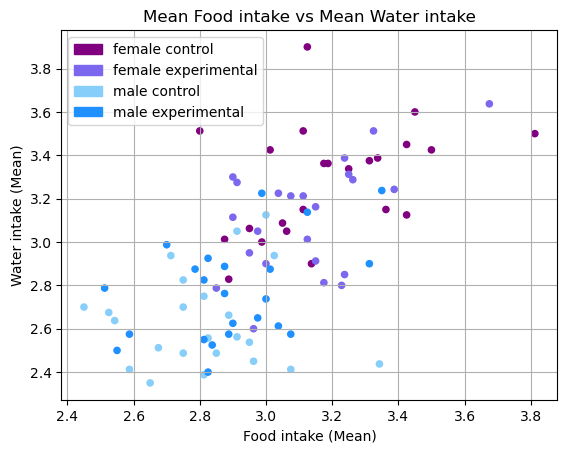

In [65]:
#Now I want the same graph but then with the four subgroups 
#Plot here will depict mean of all animals per day
#But that's not what I wanted, I want the mean per animal for all days
import matplotlib.patches as mpatches

def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

# Calculate mean values per subgroup
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

# Get color for each data point
colors = {"3": "dodgerblue", "2": "lightskyblue", "1": "mediumslateblue", "0": "purple"}
color_list = [colors[str(int(group))] for group in mean_fw['groupn']]

# Create a scatter plot with color-coding based on the four groups
ax = mean_fw.plot.scatter(x="food_intake", y="water_intake", c=color_list, grid=True)

# Create legend handles, labels for each group, and add legend to the plot
legend_handles = [
    mpatches.Patch(color=colors["0"], label="female control"),
    mpatches.Patch(color=colors["1"], label="female experimental"),
    mpatches.Patch(color=colors["2"], label="male control"),
    mpatches.Patch(color=colors["3"], label="male experimental")
]
ax.legend(handles=legend_handles, loc='upper left')

# Set labels for the axes and title
ax.set_xlabel("Food intake (Mean)")
ax.set_ylabel("Water intake (Mean)")
ax.set_title("Mean Food intake vs Mean Water intake")

#This shows the mean per day, not per animal apparently
unique_combinations = mean_fw[['sex', 'group', 'date']].drop_duplicates()
print(unique_combinations)

Text(0.5, 1.0, 'Mean Food intake vs Mean Water intake')

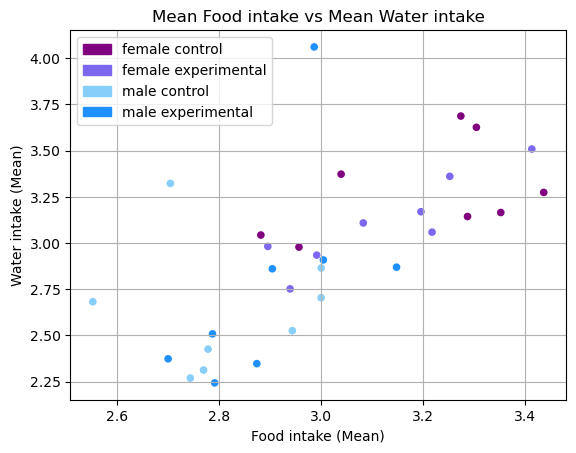

In [66]:
# So a new try for to get an overview of all animals: their mean food intake plotted against their mean water intake

#First the same stemps as in previous cells, cleaning the dataframe. 
def remove_outliers(df, column):
    values = []
    for idx, row in df.iterrows():
        if row[column] < 1 or row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    return values

def remove_and_clean(df):
    """Removes unnecessary rows and cleans data to get rid of erroneous values.
    Args:
        df (Pandas dataframe): Contains data from niacin experiment
    Returns:
        Dataframe: Cleaned dataframe
    """
    df_cleaned = (
        df.query("food_yesterday != -1.0")
        .assign(food_intake=lambda df_: remove_outliers(df_, "food_intake"))
        .assign(water_intake=lambda df_: remove_outliers(df_, "water_intake"))
    )
    return df_cleaned

# Cleans the dataframe for food intake and water intake: removes the outliers using "remove_and_clean" and removes
# all of the -1 values
df_food_water = remove_and_clean(df)

#Get the mean of all values from the animals by animal_id
mean_fw = df_food_water.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

# Get color for each data point
colors = {"3": "dodgerblue", "2": "lightskyblue", "1": "mediumslateblue", "0": "purple"}
color_list = [colors[str(int(group))] for group in mean_fw['groupn']]

# Create a scatter plot with color-coding based on the four groups
ax = mean_fw.plot.scatter(x="food_intake", y="water_intake", c=color_list, grid=True)

# Create legend handles, labels for each group, and add legend to the plot
legend_handles = [
    mpatches.Patch(color=colors["0"], label="female control"),
    mpatches.Patch(color=colors["1"], label="female experimental"),
    mpatches.Patch(color=colors["2"], label="male control"),
    mpatches.Patch(color=colors["3"], label="male experimental")
]
ax.legend(handles=legend_handles, loc='upper left')

# Set labels for the axes and title
ax.set_xlabel("Food intake (Mean)")
ax.set_ylabel("Water intake (Mean)")
ax.set_title("Mean Food intake vs Mean Water intake")

In [29]:
# New project: Try to run a t-test on the data to see if there are significant differences between the groups 
# Then, To display all individual animals's course in body weight, water and food intake
# Might be a bit much: Perhaps plot it in multiple plots 

ValueError: 'x' and 'y' must have the same size

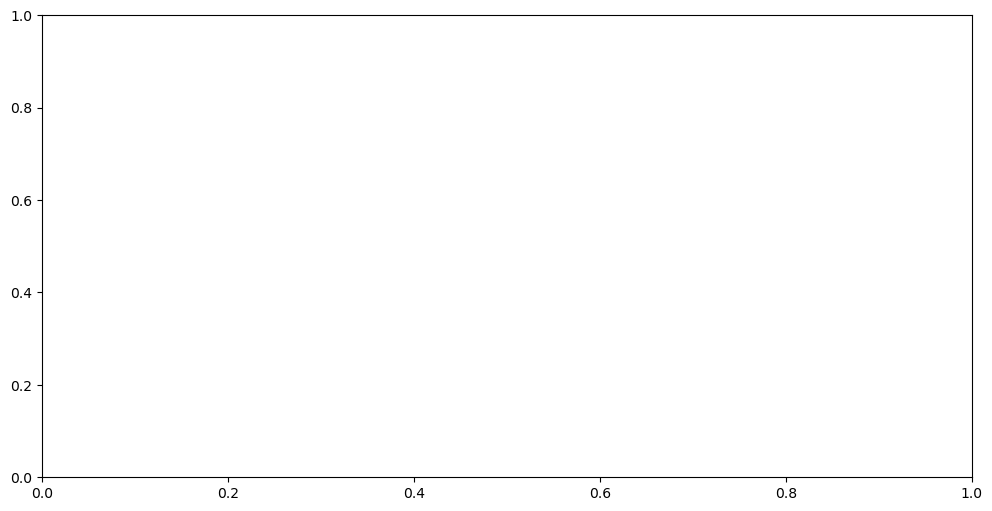

In [77]:
 # Plotting individuals' bodyweight for only female experimental group

# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each group in first subplot
ax.errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

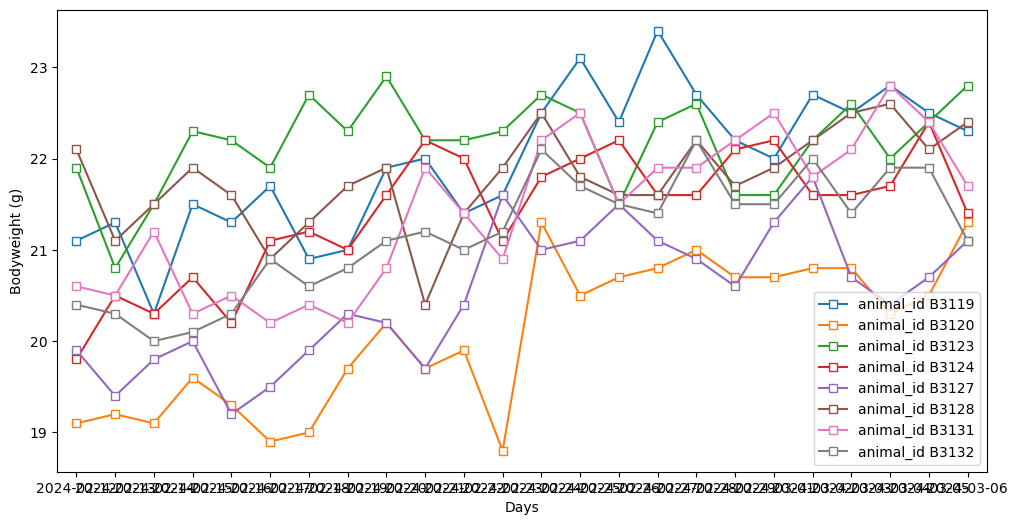

In [80]:
import matplotlib.pyplot as plt

# Subset the DataFrame for the female experimental group
female_experimental_data = df[(df['sex'] == 'female') & (df['group'] == 'experimental')]

# Set x values based on the number of days
x_values = np.arange(len(female_experimental_data['date'].unique()))

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique samples in the dataset
samples = female_experimental_data['animal_id'].unique()

# Loop through each sample and plot the connected data points
for sample in samples:
    sample_data = female_experimental_data[female_experimental_data['animal_id'] == sample]
    ax.plot(x_values,
            sample_data['bodyweight'],
            marker='s', linestyle='-', markerfacecolor="white", label=f"animal_id {sample}")

# Set x axis limits and ticks
ax.set_xlim([-0.5, len(x_values) - 0.5])
ax.set_xticks(np.arange(len(x_values)))
ax.set_xticklabels(sorted(female_experimental_data['date'].unique()))  # Assuming 'date' is a categorical variable

# Add labels
ax.set_ylabel("Bodyweight (g)")
ax.set_xlabel("Days")

ax.legend()

# Show the plot
plt.show()


In [ ]:
#good, but now 4 subplots of the groups in one graph

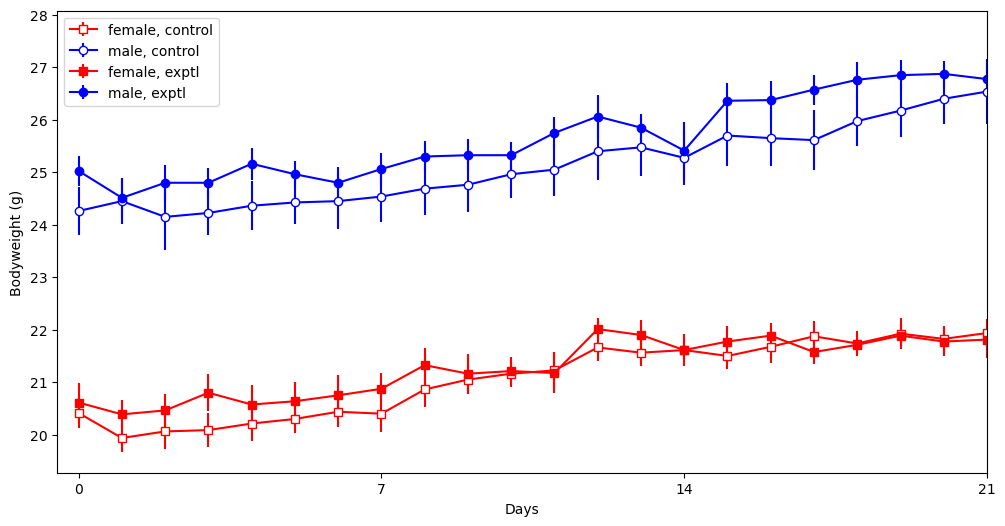

In [35]:
# Plotting individuals' bodyweight

# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each group in first subplot
ax.errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax.errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax.errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax.errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax.set_xlim([-0.5,21])
ax.set_xticks([0,7,14,21])

# Add labels
ax.set_ylabel("Bodyweight (g)")
ax.set_xlabel("Days")

ax.legend()

In [36]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [31]:
# Next, try to perform a t-test and get the result in the graph


#This is from an example on internet, could be used:
t_stat, p_value = stats.ttest_1samp(student_scores, mu)
print("T statistic:", t_stat)
print("P-value:", p_value)


NameError: name 'stats' is not defined